In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("census_income.csv")   
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

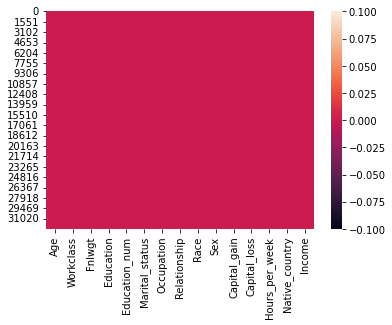

In [6]:
sns.heatmap(df.isnull())

There are No null values present in the Data.

In [7]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

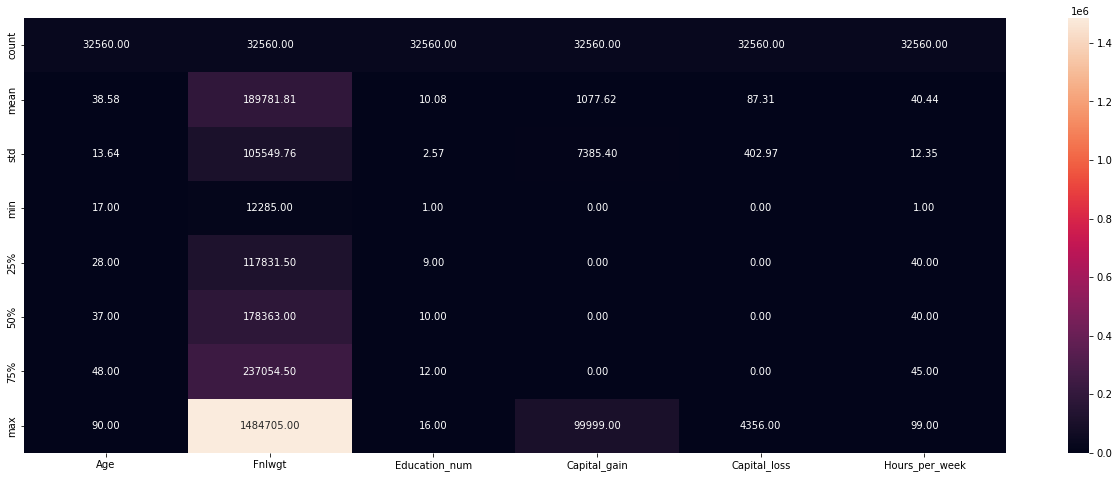

In [8]:
plt.figure(figsize=(22,8))
sns.heatmap(df.describe(),annot=True,fmt="0.2f")

OBSERVATIONS:-

   1. The average age of Working Population is around 38 Years.
   2. The average years spend on Education by the people working is 10 years.
   3. The average hours per week spend by people working is 40 hours.

In [9]:
df.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [10]:
df.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [11]:
df.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Occupation','Looking closely to the data from above we can see that the Columns 'Workclass','Occupation'& 'Native_country' contains ' ? ' as the entries which corresponds to the Null Values.

Converting '?' into Null Values whereever present in the DataSet.

In [12]:
df = df.replace(' ?', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       30724 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      30717 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  31977 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [13]:
df.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Now we can see that the Null values are present in the DataSet.

We will Treat these Null values later.

# Exploratory Data Analysis & Visualization

UNIVARIATE ANALYSIS

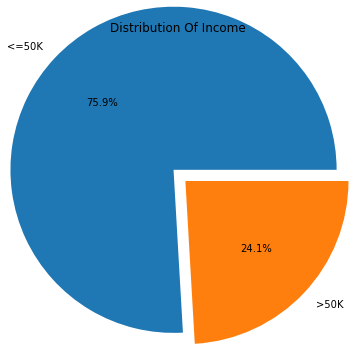

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


In [14]:
at = df.groupby('Income')['Income'].count()
plt.figure(figsize=(10,5))
plt.pie(at, labels=['<=50K', '>50K'], explode=[0.05, 0.1], radius=1.5, autopct='%1.1f%%')
plt.title("Distribution Of Income")
plt.show()
print(df['Income'].value_counts())

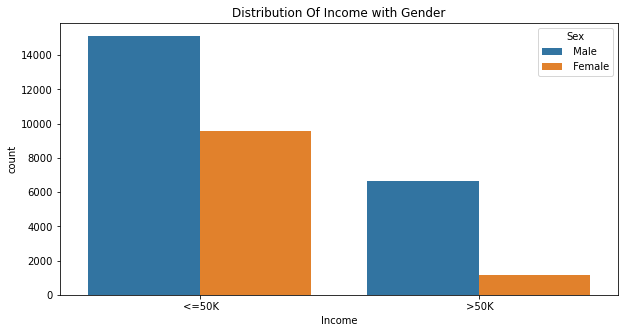

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(x='Income',hue='Sex',data=df)
plt.title("Distribution Of Income with Gender")
plt.show()

From above we can see that almost 76 % of the working population has income less that 50k, Whereas only 24% of the population earns above 50k.

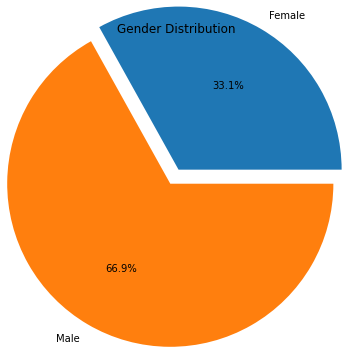

 Male      21789
 Female    10771
Name: Sex, dtype: int64


In [16]:
at = df.groupby('Sex')['Sex'].count()
plt.figure(figsize=(10,5))
plt.pie(at, labels=['Female','Male'], explode=[0.05, 0.1], radius=1.5, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()
print(df['Sex'].value_counts())

From above chart we can note that almost 67% of the working population is Male. While only 33% are Females.

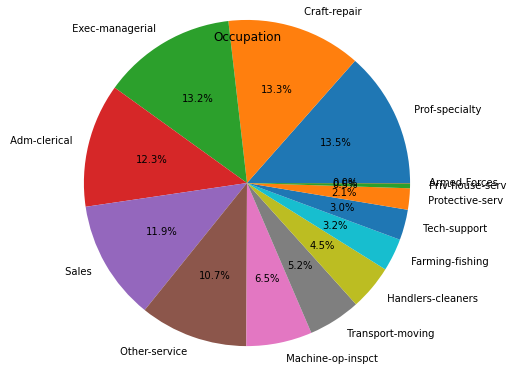

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


In [17]:
mar = df['Occupation'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(mar.values, labels=mar.index, radius=1.5, autopct='%1.1f%%')
plt.title("Occupation")
plt.show()
print(df['Occupation'].value_counts())

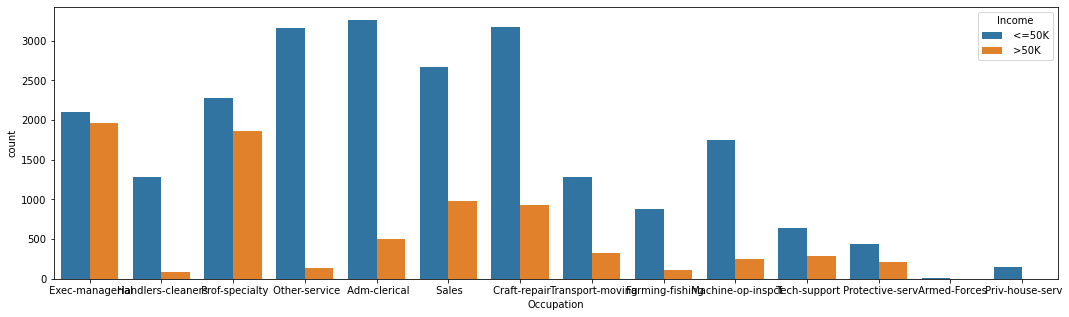

In [18]:
plt.figure(figsize=(18,5))
sns.countplot(x='Occupation',hue='Income',data=df)
plt.show()

OBSERVATIONS:-

   1. Most of the people are working as Prof-specialty , Craft-repair & Exec-managerial.
   2. Also people working as Exec-managerial & Prof-specialty are more likely to earn >50k.

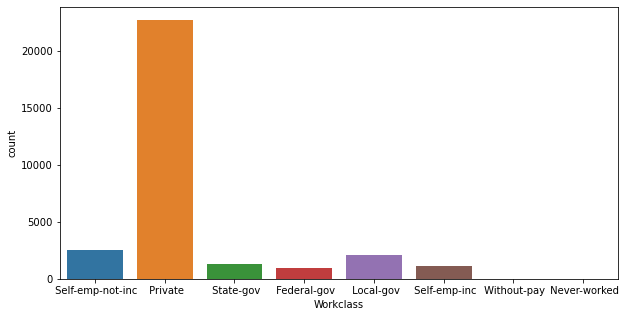

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='Workclass',data=df)
plt.show()

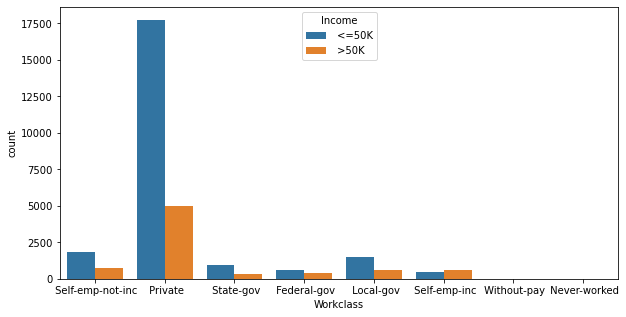

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='Workclass',hue='Income',data=df)
plt.show()

OBSERVATIONS: -
   1. The Maximum number of pepople are Employed in Private Companies.
   2. Also, compartively Employees Self-employeed are more likely to earn more than 50K.   

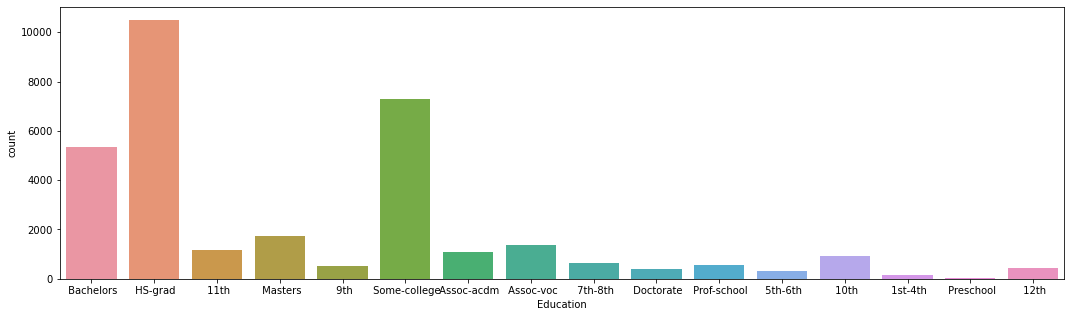

In [21]:
plt.figure(figsize=(18,5))
sns.countplot(x='Education',data=df)
plt.show()

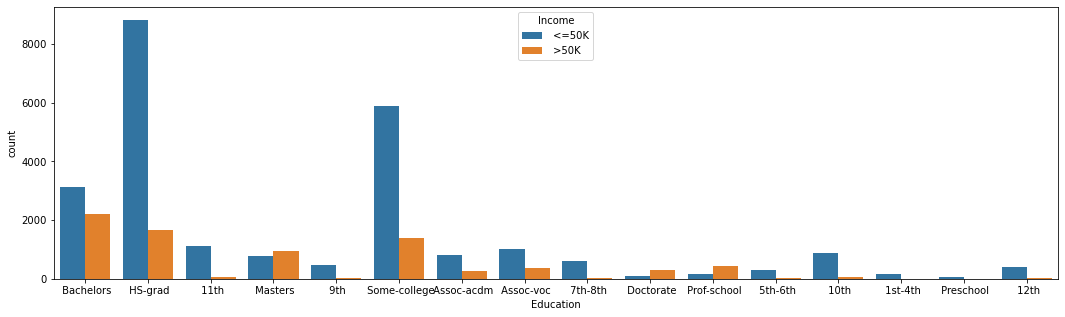

In [22]:
plt.figure(figsize=(18,5))
sns.countplot(x='Education',hue='Income',data=df)
plt.show()

OBSERVATIONS:-

   1. We can see that most of the Working Population Has Education Qualification of HS-grad, Some-College or Bachelors.
   2. Also, People having Education Qualification of Masters, Doctorate & Prof-school are more likely to earn more than 50k than. 

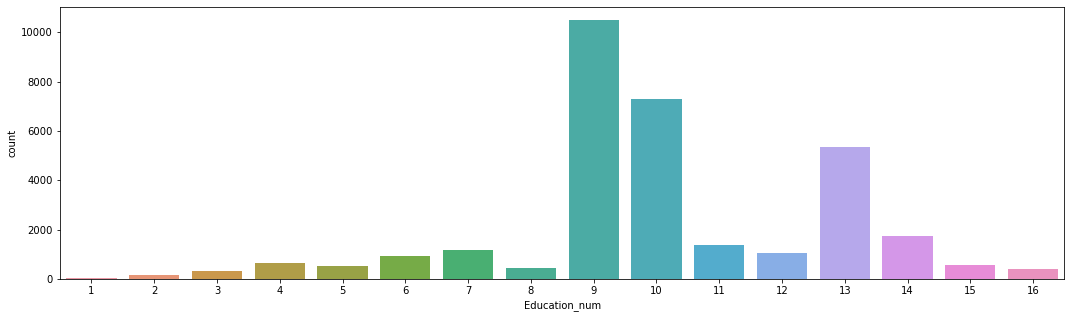

In [23]:
plt.figure(figsize=(18,5))
sns.countplot(x='Education_num',data=df)
plt.show()

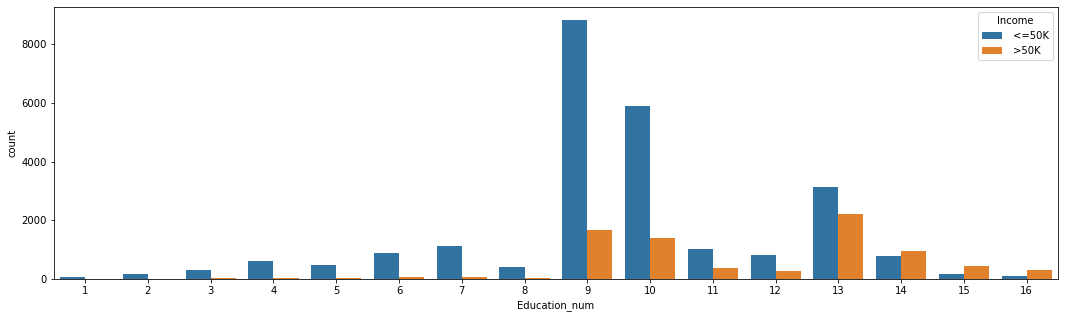

In [24]:
plt.figure(figsize=(18,5))
sns.countplot(x='Education_num',hue='Income',data=df)
plt.show()

OBSERVATION:-

   1. We can see that Most of the Employees have given around 9-10 years in Education.
   2. Also, people spending 14-16 years in Education are more likely to earn more than 50k.

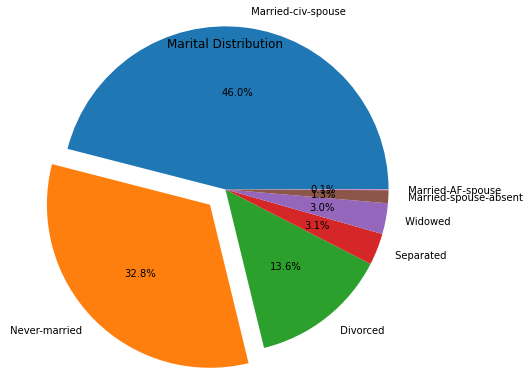

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


In [25]:
mar = df['Marital_status'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(mar.values, labels=mar.index, explode=[0, 0.20, 0, 0, 0, 0, 0], radius=1.5, autopct='%1.1f%%')
plt.title("Marital Distribution")
plt.show()
print(df['Marital_status'].value_counts())

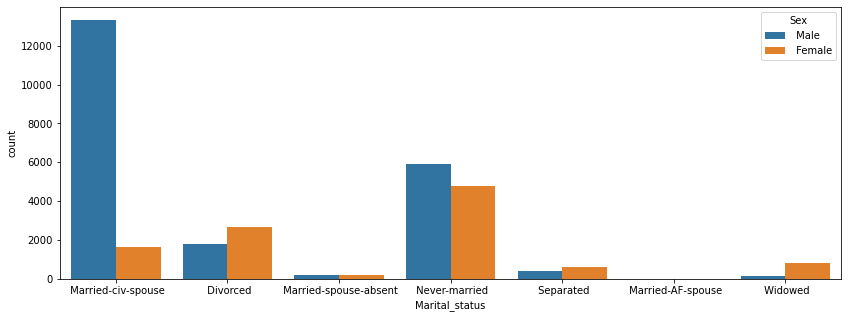

In [26]:
plt.figure(figsize=(14,5))
sns.countplot(x='Marital_status',hue='Sex',data=df)
plt.show()

OBSEVATIONS:-

   1. Most of the working population consits of people who are either Married with Spouse or has been Never Married.
   2. Also, comparetively Working Single women i.e. Divorced, Separated & Widowed Females are more in numbers than Men.

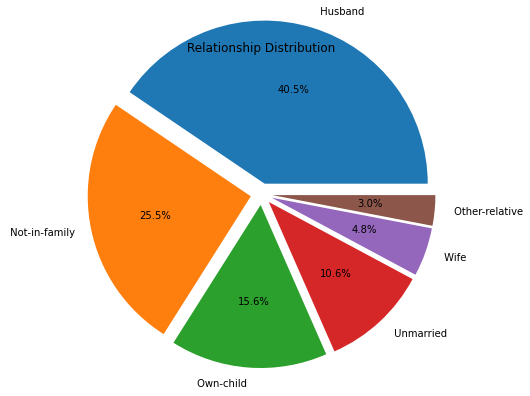

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


In [27]:
mar = df['Relationship'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(mar.values, labels=mar.index, explode=[0.10, 0.10, 0.10, 0.10, 0.10, 0.10], radius=1.5, autopct='%1.1f%%')
plt.title("Relationship Distribution")
plt.show()
print(df['Relationship'].value_counts())

Most of the Working Population are 'Husband' or are 'Not in Family'. 

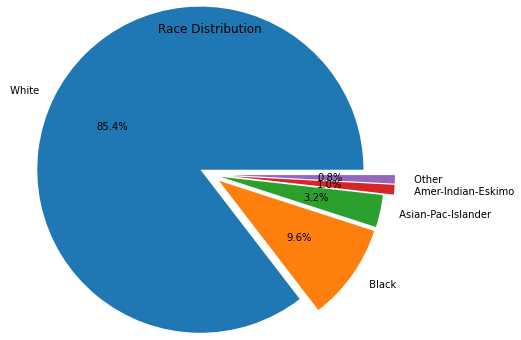

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


In [28]:
mar = df['Race'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(mar.values, labels=mar.index, explode=[0.10, 0.10, 0.10, 0.20, 0.20], radius=1.5, autopct='%1.1f%%')
plt.title("Race Distribution")
plt.show()
print(df['Race'].value_counts())

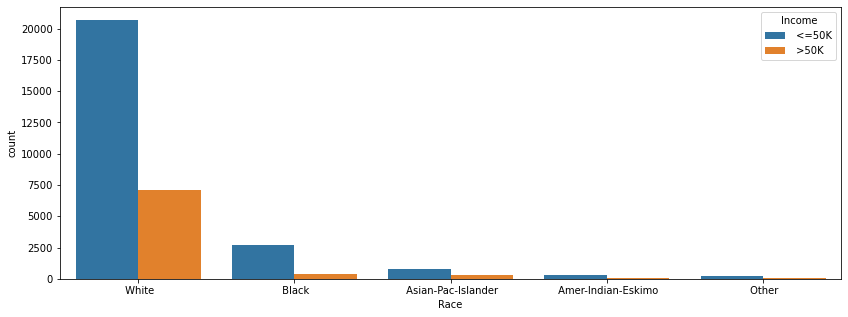

In [29]:
plt.figure(figsize=(14,5))
sns.countplot(x='Race',hue='Income',data=df)
plt.show()

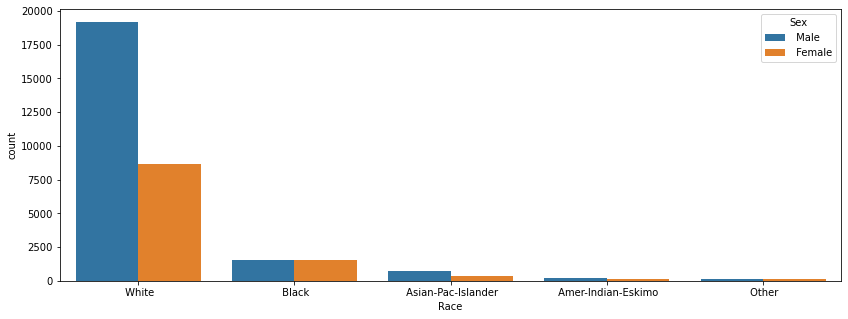

In [30]:
plt.figure(figsize=(14,5))
sns.countplot(x='Race',hue='Sex',data=df)
plt.show()

OBSERVATION:-

   1. Most of the Working Population in U.S. consists of White People(85.4%) whereas only (9.6%) are Black People.
   2. There are equal no. of Males & Females working in Black Race group.
   3. Also, people belonging to black race group are less in nos. that are earning more than 50k.

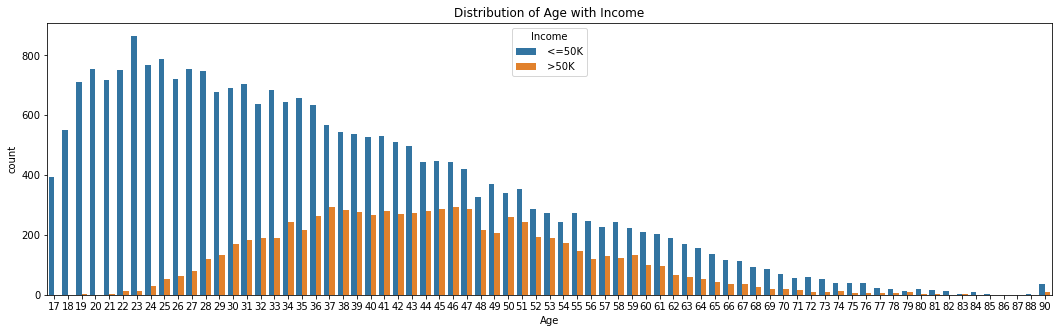

In [31]:
plt.figure(figsize=(18,5))
sns.countplot(x='Age',hue='Income',data=df)
plt.title("Distribution of Age with Income")
plt.show()

# Distribution Plots

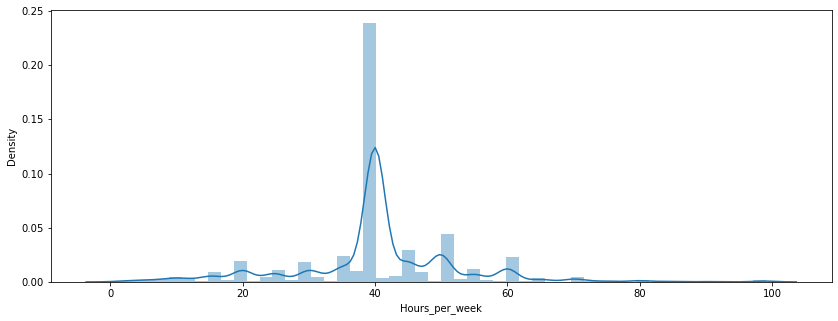

In [32]:
plt.figure(figsize=(14,5))
sns.distplot(df['Hours_per_week'])
plt.show()

Majority of the Employees are working 40 hrs a week.

# Bivarate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

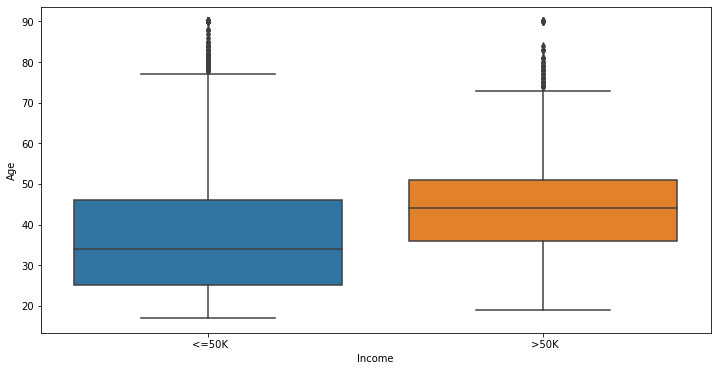

In [33]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Income',y='Age',data=df)
plt.show

Average age of people earning more than 50k is more than the ones earning below 50k.

<function matplotlib.pyplot.show(close=None, block=None)>

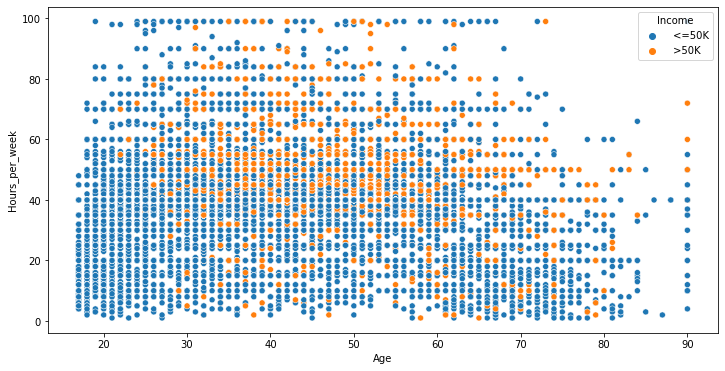

In [34]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Age',y='Hours_per_week',hue='Income',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

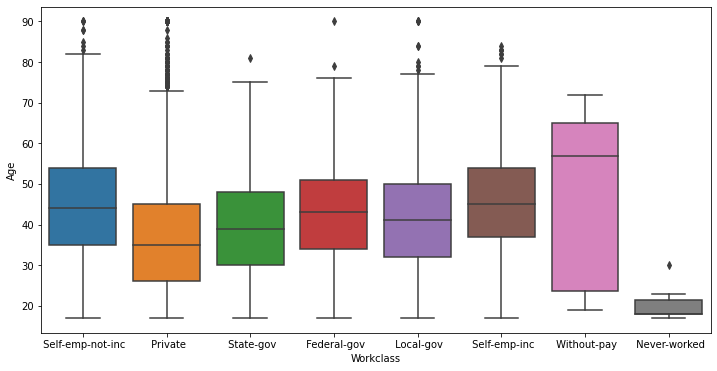

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Workclass',y='Age',data=df)
plt.show

# Multi-Variate Analysis

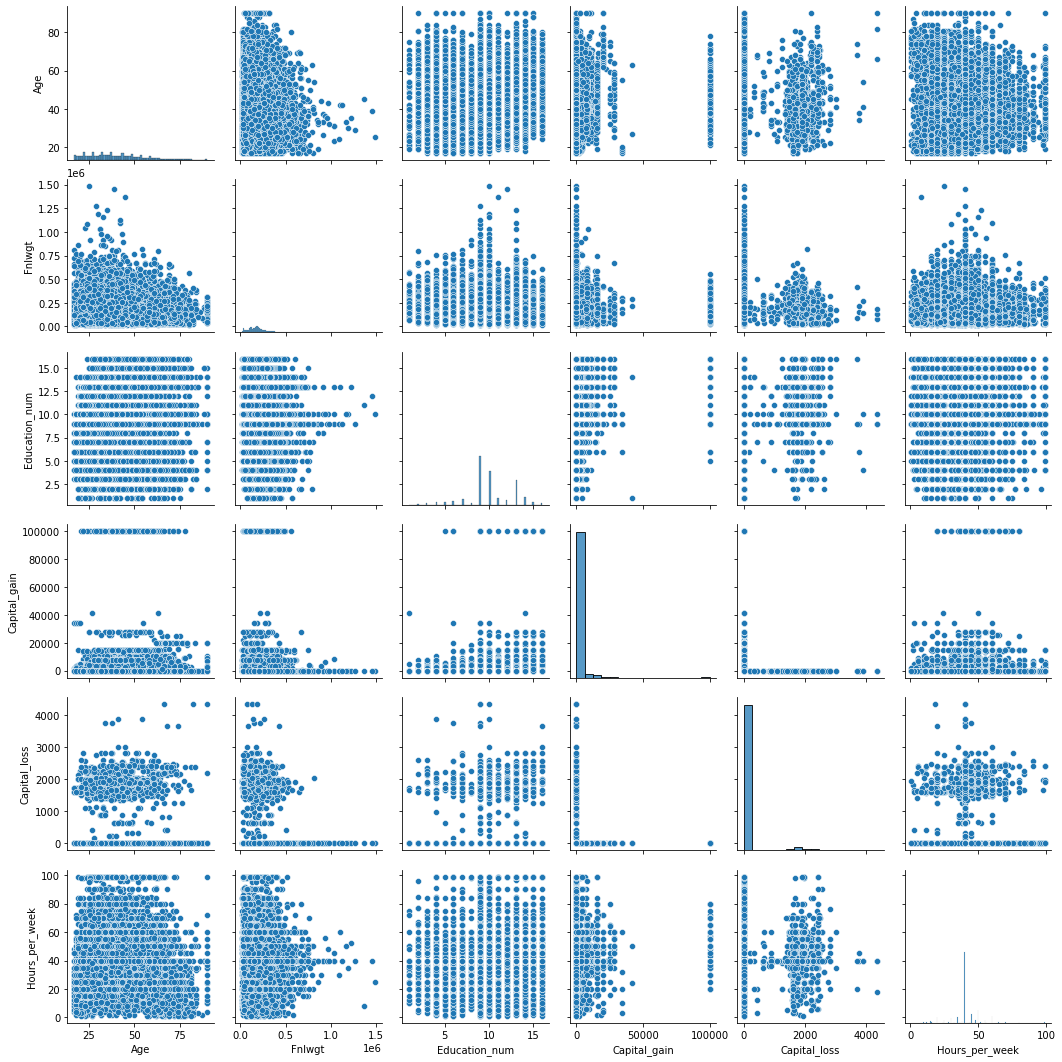

In [36]:
sns.pairplot(df)

# Treating Null Values

In [37]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

<AxesSubplot:>

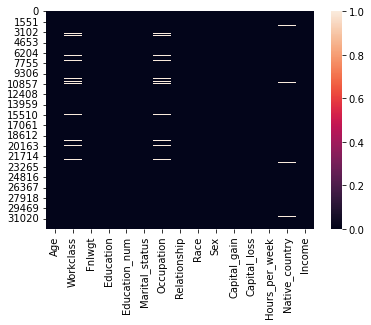

In [38]:
sns.heatmap(df.isnull())

We can see that the Null Values are present in the Data.

Replacing the Null Values from Workclass, Occupation & Native_country with MODE of the respective Columns.

In [39]:
for i in ['Workclass', 'Occupation', 'Native_country']:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [40]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We can see that now the Null vaues have been removed & replaced with the MODE of these Categorical Columns.

# Label Encoding

Converting the Columns with String values into integer values to use these features for M.L. model.

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Workclass']=le.fit_transform(df['Workclass'])
df['Education']=le.fit_transform(df['Education'])
df['Marital_status']=le.fit_transform(df['Marital_status'])
df['Occupation']=le.fit_transform(df['Occupation'])
df['Relationship']=le.fit_transform(df['Relationship'])
df['Race']=le.fit_transform(df['Race'])
df['Sex']=le.fit_transform(df['Sex'])
df['Native_country']=le.fit_transform(df['Native_country'])
df['Income']=le.fit_transform(df['Income'])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


Now we can see that all the Columns with String Values have been converted to Integer values using Label Encoding.

# CORRELATION

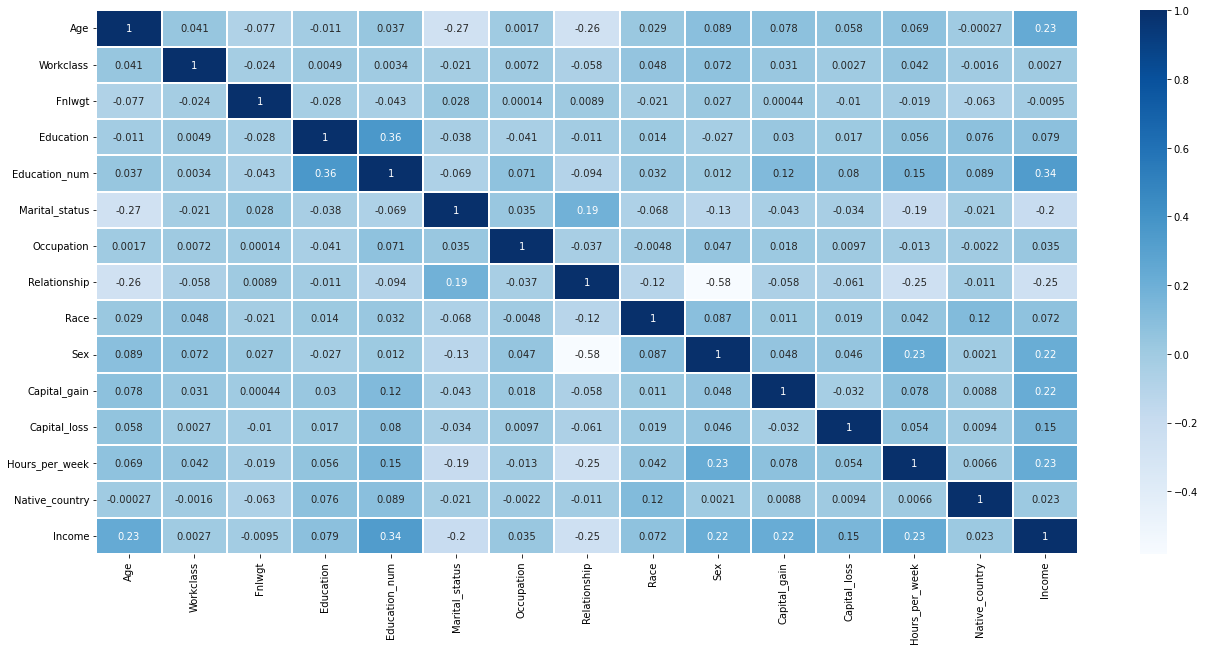

In [42]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,linewidths = 2,cmap="Blues")
plt.show()

CORRELATION with the Income Column

In [43]:
df.corr()['Income'].sort_values()

Relationship     -0.250924
Marital_status   -0.199295
Fnlwgt           -0.009481
Workclass         0.002739
Native_country    0.023063
Occupation        0.034599
Race              0.071853
Education         0.079311
Capital_loss      0.150523
Sex               0.215995
Capital_gain      0.223333
Hours_per_week    0.229690
Age               0.234039
Education_num     0.335182
Income            1.000000
Name: Income, dtype: float64

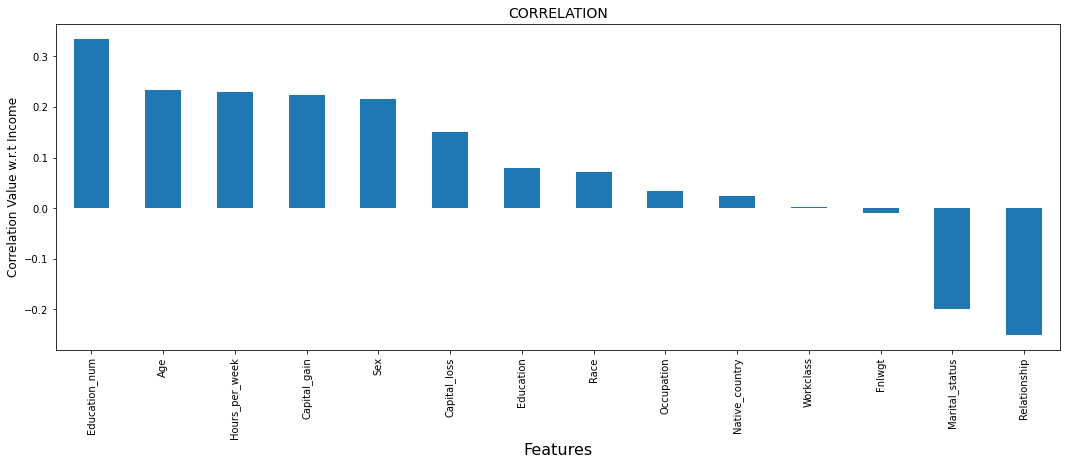

In [44]:
plt.figure(figsize=(18,6))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar')
plt.xlabel("Features",fontsize=16)
plt.ylabel("Correlation Value w.r.t Income",fontsize=12)
plt.title("CORRELATION",fontsize=14)
plt.show()

OBSERVATION from Correlation Chart:-
   1. All columns except 'Relationship' & 'Marital_status' are showing +ve Correlation with the Target Variable i.e. Income.
   2. Also, 'Fnlwgt' & 'Workclass' Columns almost have NO correlation with the Target (Income) Column.

# Data Preparation

Splitting data into Target & Independent columns

In [45]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [46]:
x=df.drop({'Income'},axis=1)         # Independent Columns

y=df.iloc[:,-1]          # Target Column

# Data Balancing

In [47]:
y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

As we can see that the no. of entries for Income Type has huge Difference.Therefore, Using SMOTE to Balance the data.

In [48]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
dx,dy=sm.fit_resample(x,y)
dy

0        0
1        0
2        0
3        0
4        0
        ..
49433    1
49434    1
49435    1
49436    1
49437    1
Name: Income, Length: 49438, dtype: int32

In [49]:
dy.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

Now we can see that the Data is Balanced.

In [50]:
dy = pd.DataFrame(dy)
dy

,Income
0,0
1,0
2,0
3,0
4,0
...,...
49433,1
49434,1
49435,1
49436,1


In [51]:
dx.shape

(49438, 14)

# Treating Outliers

Removing Outliers using Z-score

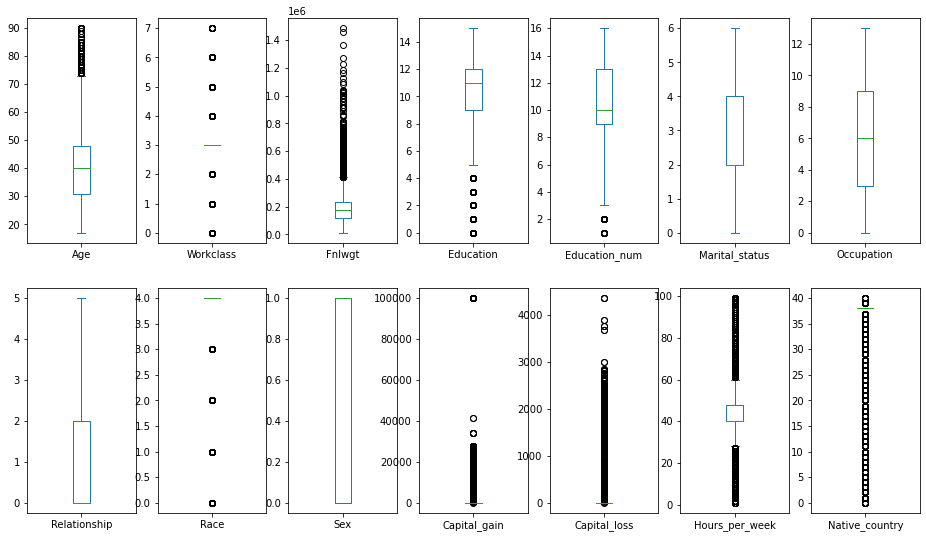

In [52]:
dx.plot(kind='box',subplots=True,layout=(5,7),figsize=(16,24)) 
plt.show()

From above Boxplots We can see that the Ouliers are present in 'Age', 'Fnlwgt' & 'Capital_gain', 'Capital_loss' & 'Hours_per_week'

In [53]:
from scipy.stats import zscore               # Removing Outliers from independent variables
z=np.abs(zscore(dx))
z

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.778893,1.844181,1.014744,0.397151,1.038120,0.292733,0.822259,0.737138,0.398376,0.667215,0.195536,0.256058,2.529026,0.268920
1,0.189757,0.000336,0.250675,0.188547,0.603362,1.807426,0.287253,0.082272,0.398376,0.667215,0.195536,0.256058,0.179234,0.268920
2,1.021055,0.000336,0.433074,2.739941,1.424103,0.292733,0.287253,0.737138,2.055207,0.667215,0.195536,0.256058,0.179234,0.268920
3,0.996965,0.000336,1.424563,0.397151,1.038120,0.292733,0.782760,2.537190,2.055207,1.498768,0.195536,0.256058,0.179234,5.716183
4,0.270478,0.000336,0.909857,0.481395,1.448491,0.292733,0.822259,2.537190,0.398376,1.498768,0.195536,0.256058,0.179234,0.268920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,0.351199,0.000336,1.714949,1.067093,0.603362,0.292733,0.782760,0.737138,0.398376,0.667215,0.195536,0.256058,1.474323,0.268920
49434,0.109036,2.766440,2.015194,0.397151,0.217379,0.292733,0.247753,0.737138,0.828416,0.667215,0.195536,0.256058,0.179234,0.268920
49435,0.270478,0.000336,0.467651,0.104302,0.192992,0.292733,0.287253,0.737138,2.055207,0.667215,0.195536,0.256058,0.266263,0.268920
49436,0.028315,0.000336,0.171308,0.397151,0.627750,0.292733,0.822259,0.737138,0.398376,0.667215,0.311837,0.256058,0.092205,0.268920


In [54]:
# Now to take out the ouliers taking threshold 3
# All values with Z-score >3 will be considered as ouliers
# Making a new file for values with z-score<3

threshold=3
x2=dx[(z<3).all(axis=1)]
x2

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38
5,49,3,160187,6,5,3,7,1,2,0,0,0,16,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,36,3,368777,14,9,2,9,0,4,1,0,0,59,38
49434,39,6,400176,9,11,2,7,0,3,1,0,0,40,38
49435,37,3,238337,10,10,2,5,0,2,1,0,0,39,38
49436,40,3,207346,9,12,2,3,0,4,1,5178,0,41,38


In [55]:
print(np.where(z>3)[0])

[    3     9    10 ... 49415 49424 49425]


In [56]:
y2= dy.drop(np.where(z>3)[0],axis=0)     # Dropping the rows from same locations from target varibles
y2

,Income
0,0
1,0
2,0
4,0
5,0
...,...
49433,1
49434,1
49435,1
49436,1


In [57]:
x2.shape

(40503, 14)

# Treating Skewness

In [58]:
x2.skew().sort_values(ascending=False)

Capital_loss      14.670025
Capital_gain       3.618955
Relationship       1.113365
Fnlwgt             0.624329
Marital_status     0.280553
Age                0.231320
Occupation         0.038304
Education_num     -0.098055
Workclass         -0.107320
Hours_per_week    -0.289517
Education         -0.786075
Sex               -0.807482
Race              -2.602671
Native_country    -5.422854
dtype: float64

Not removing the Skewness as Most of the the Columns are Categorical in Nature.

# Treating Multicollinearity

Checking Variance Inflation Factor(VIF)

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [65]:
calc_vif(x2)

,Variables,VIF FACTOR
0,Age,13.584512
1,Workclass,8.495783
2,Fnlwgt,4.816520
3,Education,13.142250
4,Education_num,26.617855
5,Marital_status,4.632728
6,Occupation,3.595245
7,Relationship,2.584883
8,Race,41.499173
9,Sex,4.915061


Removing the Column with Highest VIF Value i.e. 'Native_country'.	

In [66]:
x2.drop({'Native_country'},axis=1,inplace=True)          
calc_vif(x2)

,Variables,VIF FACTOR
0,Age,11.973673
1,Workclass,8.303118
2,Fnlwgt,4.677523
3,Education,12.520677
4,Education_num,24.423735
5,Marital_status,4.326486
6,Occupation,3.567122
7,Relationship,2.353338
8,Race,31.226928
9,Sex,4.801391


In [67]:
x2.drop({'Race'},axis=1,inplace=True)          
calc_vif(x2)

,Variables,VIF FACTOR
0,Age,11.140139
1,Workclass,7.942372
2,Fnlwgt,4.657689
3,Education,12.130319
4,Education_num,22.428455
5,Marital_status,4.203584
6,Occupation,3.549699
7,Relationship,2.281427
8,Sex,4.654558
9,Capital_gain,1.159107


Now we cann see that the V.I.F. values have been reduced significantly & Most of the Values are below 10.

# Data Scaling

In [68]:
x2

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week
0,50,5,83311,9,13,2,3,0,1,0,0,13
1,38,3,215646,11,9,0,5,1,1,0,0,40
2,53,3,234721,1,7,2,5,0,1,0,0,40
4,37,3,284582,12,14,2,3,5,0,0,0,40
5,49,3,160187,6,5,3,7,1,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...
49433,36,3,368777,14,9,2,9,0,1,0,0,59
49434,39,6,400176,9,11,2,7,0,1,0,0,40
49435,37,3,238337,10,10,2,5,0,1,0,0,39
49436,40,3,207346,9,12,2,3,0,1,5178,0,41


As we can see the above columns are in different scales. So we will use encoding techniques to scale the data.

In [69]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()

In [70]:
scale=st.fit_transform(x2)
x2=pd.DataFrame(scale,columns=x2.columns)
x2

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Sex,Capital_gain,Capital_loss,Hours_per_week
0,0.832446,1.849388,-1.090315,-0.532315,1.122654,-0.282471,-0.799622,-0.744134,0.674696,-0.324855,-0.072747,-2.837682
1,-0.166386,0.012742,0.322750,0.117328,-0.718849,-1.786963,-0.269473,-0.089052,0.674696,-0.324855,-0.072747,-0.182153
2,1.082154,0.012742,0.526432,-3.130889,-1.639600,-0.282471,-0.269473,-0.744134,0.674696,-0.324855,-0.072747,-0.182153
3,-0.249622,0.012742,1.058844,0.442150,1.583029,-0.282471,-0.799622,2.531275,-1.482148,-0.324855,-0.072747,-0.182153
4,0.749210,0.012742,-0.269438,-1.506780,-2.560351,0.469775,0.260677,-0.089052,-1.482148,-0.324855,-0.072747,-2.542624
...,...,...,...,...,...,...,...,...,...,...,...,...
40498,-0.332857,0.012742,1.957873,1.091793,-0.718849,-0.282471,0.790827,-0.744134,0.674696,-0.324855,-0.072747,1.686553
40499,-0.083150,2.767711,2.293149,-0.532315,0.201902,-0.282471,0.260677,-0.744134,0.674696,-0.324855,-0.072747,-0.182153
40500,-0.249622,0.012742,0.565043,-0.207494,-0.258473,-0.282471,-0.269473,-0.744134,0.674696,-0.324855,-0.072747,-0.280506
40501,0.000086,0.012742,0.234123,-0.532315,0.662278,-0.282471,-0.799622,-0.744134,0.674696,1.141483,-0.072747,-0.083800


Now we can see all the Input data is in same scale.

# Splitting the Data

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

Finding out the best Random State Value.

In [74]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test= train_test_split(x2,y2,random_state=i,test_size=0.22)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_test,pred_test)*100,1) > 78.0:
        print("At random state",i,"The model preforms very well")
        print("Model Accuracy score is :-",accuracy_score(y_test,pred_test)*100,'\n')

At random state 204 The model preforms very well
Model Accuracy score is :- 78.15060038155089 

At random state 490 The model preforms very well
Model Accuracy score is :- 78.07204578610705 

At random state 587 The model preforms very well
Model Accuracy score is :- 78.12815621142408 



From above we can see that Model is performing best at Random State = 204. Beacuse for random state=204 Model's accuracy score is highest

Therefore, using Random State = 204 for further working & Splitting the DataFrame.

In [89]:
x_train,x_test,y_train,y_test= train_test_split(x2,y2,random_state=204,test_size=0.22)

In [90]:
x_train.shape

(31592, 12)

In [91]:
y_train.shape

(31592, 1)

In [92]:
x_test.shape

(8911, 12)

In [93]:
y_test.shape

(8911, 1)

# Testing with Different Models

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [101]:
lg = LogisticRegression()
gn = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()

model = [lg,gn,knn,svc,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred_test=m.predict(x_test)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))
    print('\n')

Accuracy Score of LogisticRegression() is: 0.7815060038155089
[[3429 1071]
 [ 876 3535]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      4500
           1       0.77      0.80      0.78      4411

    accuracy                           0.78      8911
   macro avg       0.78      0.78      0.78      8911
weighted avg       0.78      0.78      0.78      8911



Accuracy Score of GaussianNB() is: 0.7765682863876108
[[3839  661]
 [1330 3081]]
              precision    recall  f1-score   support

           0       0.74      0.85      0.79      4500
           1       0.82      0.70      0.76      4411

    accuracy                           0.78      8911
   macro avg       0.78      0.78      0.77      8911
weighted avg       0.78      0.78      0.78      8911



Accuracy Score of KNeighborsClassifier() is: 0.8517562563124228
[[3787  713]
 [ 608 3803]]
              precision    recall  f1-score   support

           0       0.86   

From above we can see that KNeighborsClassifier(), SVC() & DecisionTreeClassifier() are permoving well with the Model.

Where KNeighborsClassifier() has highest accuracy Score among all. 

# Ensemble Techniques

Using various Bagging & Boosting Ensemble methods to train the data to increase the model performance.

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
rf = RandomForestClassifier()
bg = BaggingClassifier()
ad = AdaBoostClassifier()
gb = GradientBoostingClassifier()

model = [rf,bg,ad,gb]

for m in model:
    m.fit(x_train,y_train)
    pred_test=m.predict(x_test)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))
    print('\n')

Accuracy Score of RandomForestClassifier() is: 0.8948490629558972
[[4026  474]
 [ 463 3948]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4500
           1       0.89      0.90      0.89      4411

    accuracy                           0.89      8911
   macro avg       0.89      0.89      0.89      8911
weighted avg       0.89      0.89      0.89      8911



Accuracy Score of BaggingClassifier() is: 0.8820558859836157
[[4054  446]
 [ 605 3806]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      4500
           1       0.90      0.86      0.88      4411

    accuracy                           0.88      8911
   macro avg       0.88      0.88      0.88      8911
weighted avg       0.88      0.88      0.88      8911



Accuracy Score of AdaBoostClassifier() is: 0.8584895073504657
[[3769  731]
 [ 530 3881]]
              precision    recall  f1-score   support

           0     

From above we can see that all Ensemble Algorithms are Obtaining Good Accuracy Scores with the Models.

Where, RandomForestClassifier() is getting Highest Accuracy.

# Gradient Descent Algorithm

In [104]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()

In [106]:
sgd.fit(x_train,y_train)
pred_test=sgd.predict(x_test)
print('Accuracy Score of',sgd,'is:',accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy Score of SGDClassifier() is: 0.7703961396027382
[[3006 1494]
 [ 552 3859]]
              precision    recall  f1-score   support

           0       0.84      0.67      0.75      4500
           1       0.72      0.87      0.79      4411

    accuracy                           0.77      8911
   macro avg       0.78      0.77      0.77      8911
weighted avg       0.78      0.77      0.77      8911



SGDClassifier() is not performing well as compared to the other Algorithms.

# Cross-Validation of Algorithms

Checking cross_val_scores for all the Algorithms that are performing well to know the which Algorithm is actually working best for the the Model.

In [108]:
from sklearn.model_selection import cross_val_score
model = [knn,svc,dtc,rf,bg,ad,gb]

for m in model:
    pred_test=m.predict(x_test)
    score = cross_val_score(m,x2,y2,cv=5)
    c_score = score.mean()
    print("For",m,"Cross Validation score is:-",c_score*100)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test)*100)
    print("\n")

For KNeighborsClassifier() Cross Validation score is:- 85.05802880607638
Accuracy Score of KNeighborsClassifier() is: 85.17562563124228


For SVC() Cross Validation score is:- 84.36669242175559
Accuracy Score of SVC() is: 85.31029065200315


For DecisionTreeClassifier() Cross Validation score is:- 83.89524932907231
Accuracy Score of DecisionTreeClassifier() is: 84.64818763326227


For RandomForestClassifier() Cross Validation score is:- 87.81842845190579
Accuracy Score of RandomForestClassifier() is: 89.48490629558972


For BaggingClassifier() Cross Validation score is:- 86.78641289522251
Accuracy Score of BaggingClassifier() is: 88.20558859836157


For AdaBoostClassifier() Cross Validation score is:- 84.90743194332052
Accuracy Score of AdaBoostClassifier() is: 85.84895073504657


For GradientBoostingClassifier() Cross Validation score is:- 86.52463969544989
Accuracy Score of GradientBoostingClassifier() is: 87.82403770620581




Now from above we can confirm that RandomForestClassifier() is working Best for the data as:-

   1. Cross Val-Score is highest is case of RandomForestClassifier().
   2. Accuracy score is highest for RandomForestClassifier()
   2. Also, Cross Val-Score & Accuracy score are very close for RandomForestClassifier()
   
Therefore, Using RandomForestClassifier() as the Final Algorithm & Optimisaztion.

# Hyperparameter tuning

Using GridSearchCV for further Model optimization.

In [109]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()

In [110]:
grid_param = {'n_estimators':[50,100,200,300],'criterion':['gini','entropy'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[5,6,7,8]}

gd_sr = GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}


In [111]:
best_result = gd_sr.best_score_
print(best_result)

0.8648711852049228


In [112]:
gd_sr.best_estimator_

RandomForestClassifier(max_depth=8)

Using these above parameters for Final training of the Model.

In [119]:
rf = RandomForestClassifier(max_depth=8)

In [120]:
rf.fit(x_train,y_train)
pred_test=rf.predict(x_test)
print('Accuracy Score of',rf,'is:',accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy Score of RandomForestClassifier(max_depth=8) is: 0.8672427336999214
[[3841  659]
 [ 524 3887]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      4500
           1       0.86      0.88      0.87      4411

    accuracy                           0.87      8911
   macro avg       0.87      0.87      0.87      8911
weighted avg       0.87      0.87      0.87      8911



As we can see from above that the Model Performance has reduced from the default values of RandomForestClassifier(). Hence proceeding with the default parameter values of RandomForestClassifier() only.

In [122]:
rf = RandomForestClassifier()

In [124]:
rf.fit(x_train,y_train)
pred_test=rf.predict(x_test)
print('Accuracy Score of',rf,'is:',accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy Score of RandomForestClassifier() is: 0.8913702165862417
[[4008  492]
 [ 476 3935]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4500
           1       0.89      0.89      0.89      4411

    accuracy                           0.89      8911
   macro avg       0.89      0.89      0.89      8911
weighted avg       0.89      0.89      0.89      8911



# Cross-Validation of Best Model

In [126]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    score = cross_val_score(rf,x2,y2,cv=i)
    c_score = score.mean()
    print("At cv:-",i)
    print("Cross Validation score is:-",c_score*100)
    print("Accuracy Score of model is :-",accuracy_score(y_test,pred_test)*100)
    print("\n")

At cv:- 2
Cross Validation score is:- 85.42836544659018
Accuracy Score of model is :- 89.13702165862418


At cv:- 3
Cross Validation score is:- 85.45046045971904
Accuracy Score of model is :- 89.13702165862418


At cv:- 4
Cross Validation score is:- 87.07516331263122
Accuracy Score of model is :- 89.13702165862418


At cv:- 5
Cross Validation score is:- 87.61844491077919
Accuracy Score of model is :- 89.13702165862418


At cv:- 6
Cross Validation score is:- 87.87532528331423
Accuracy Score of model is :- 89.13702165862418


At cv:- 7
Cross Validation score is:- 88.02092448941522
Accuracy Score of model is :- 89.13702165862418


At cv:- 8
Cross Validation score is:- 88.1121101111378
Accuracy Score of model is :- 89.13702165862418


At cv:- 9
Cross Validation score is:- 88.29785150624964
Accuracy Score of model is :- 89.13702165862418




Accuracy score is closest to Cross Val Score at cv = 9. Using cv=9 for final Model validation.

In [127]:
rf.fit(x_train,y_train)
pred_test=rf.predict(x_test)
score = cross_val_score(rf,x2,y2,cv=9)
c_score = score.mean()
print("For",rf,"Cross Validation score is:-",c_score*100)
print('Accuracy Score of',rf,'is:',accuracy_score(y_test,pred_test)*100)

For RandomForestClassifier() Cross Validation score is:- 88.35463724110691
Accuracy Score of RandomForestClassifier() is: 89.09213331837054


We can see that the Cross Validation Score is almost equal to Accuracy Score. Hence we are heading towards a good approach and there is no overfitting/underfitting.

# AUC ROC Curve

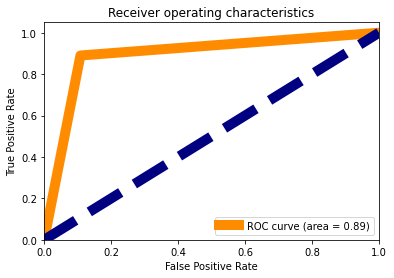

In [128]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

From above we can confirm that are Model is performing Well as the Area Under the Curve is Almost 90%.

# Saving the best Model

In [129]:
import pickle

filename = 'Census Income.pkl'

pickle.dump(rf, open(filename,'wb'))  

# Conclusion

In [130]:
loaded_model = pickle.load(open('Census Income.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8909213331837055


In [132]:
original=np.array(y_test).reshape(-1)
predicted=np.array(loaded_model.predict(x_test)).reshape(-1)
conclusion = pd.DataFrame({"Original":original,"Predicted":predicted}, index= range(len(original)))
conclusion

,Original,Predicted
0,1,1
1,0,0
2,1,0
3,0,0
4,1,1
...,...,...
8906,1,1
8907,1,1
8908,0,0
8909,0,0


From above we can see that most of the predicted & original values are matching. Hence our model is performing good.